## Importing important libraries and data

In [1]:
# import the libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import itertools
plt.style.use('fivethirtyeight')

In [2]:
# import the dataset
df = pd.read_csv('diabetes.csv') 

## Checking the data for inconsistencies

In [3]:
# show first 5 lines 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# check types and value 
# there is no null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# check for any unusual data 
round(df.describe(), 2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [6]:
# # format the data correctly 
# df.Outcome = df.Outcome.astype('category')

## Performing basic explanatory data analysis 

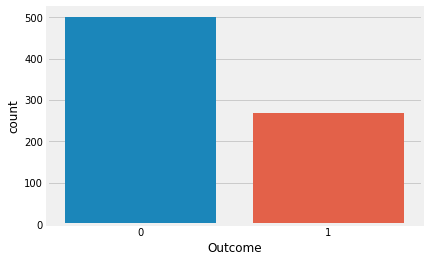

In [7]:
# count the number of people without and with diabetes
sns.countplot(x = 'Outcome', data = df)
plt.show()

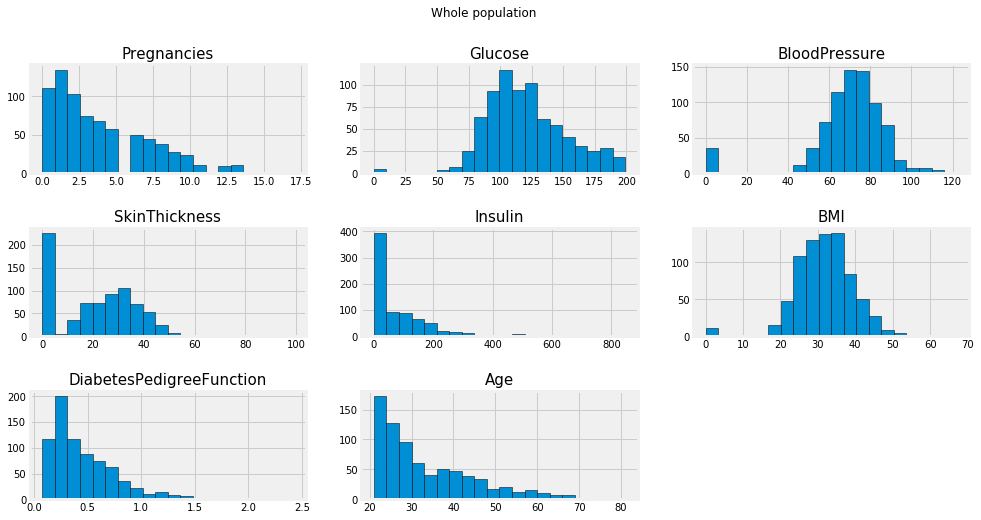

In [8]:
# show the distribution of each feature in the whole dataset 
cols = df.columns[:-1]
num_cols = len(cols)
plt.subplots(figsize = (15, 8))
plt.suptitle('Whole population')

for i, j in itertools.zip_longest(cols, range(num_cols)):
    plt.subplot(3, 3, j + 1)
    plt.subplots_adjust(hspace = 0.5)
    df[i].hist(bins = 20, edgecolor = 'black')
    plt.title(i, size = 15)

plt.show()

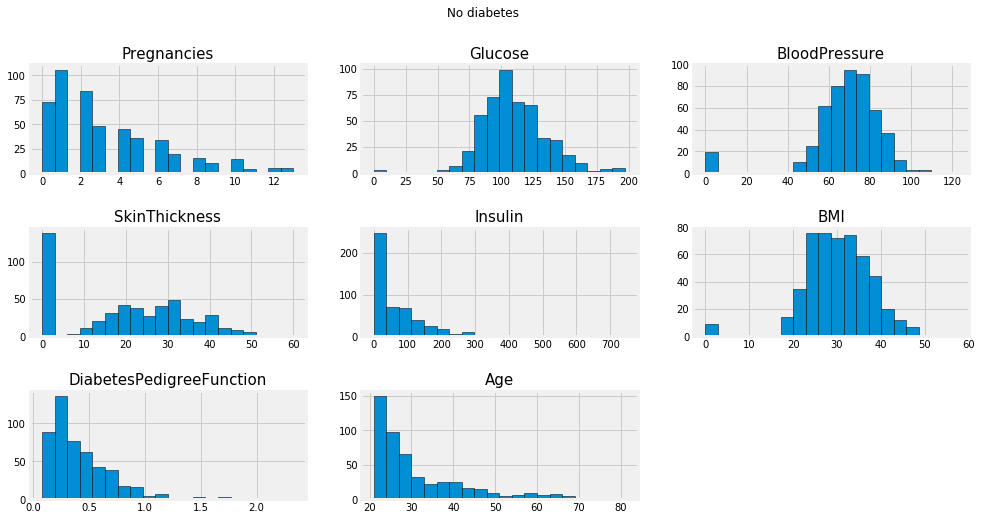

In [9]:
# show the distribution of each feature in people with no diabetes 
df_no_diab = df[df.Outcome == 0]
cols = df_no_diab.columns[:-1]
num_cols = len(cols)
plt.subplots(figsize = (15, 8))
plt.suptitle('No diabetes')

for i, j in itertools.zip_longest(cols, range(num_cols)):
    plt.subplot(3, 3, j + 1)
    plt.subplots_adjust(hspace = 0.5)
    df_no_diab[i].hist(bins = 20, edgecolor = 'black')
    plt.title(i, size = 15)

plt.show()

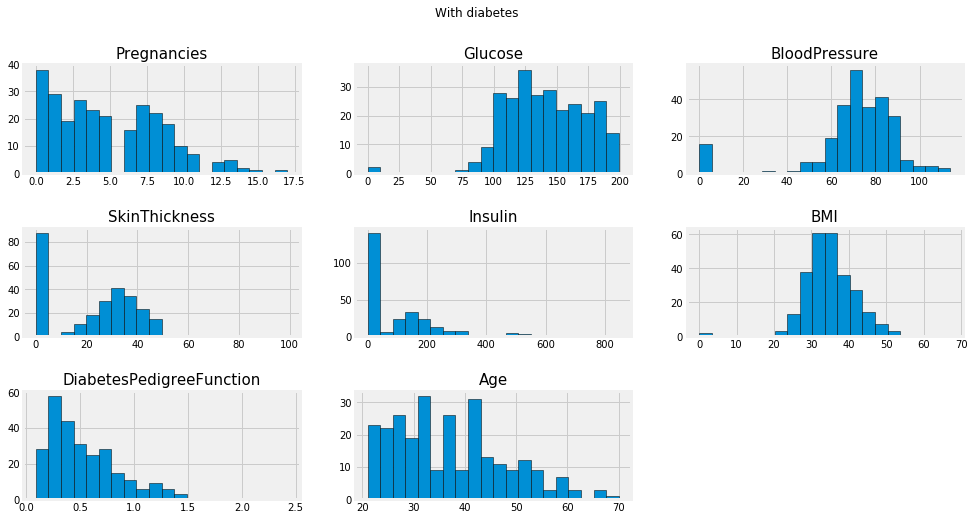

In [10]:
# show the distribution of each feature in people with diabetes  
df_diab = df[df.Outcome == 1]
cols = df_diab.columns[:-1]
num_cols = len(cols)
plt.subplots(figsize = (15, 8))
plt.suptitle('With diabetes')

for i, j in itertools.zip_longest(cols, range(num_cols)):
    plt.subplot(3, 3, j + 1)
    plt.subplots_adjust(hspace = 0.5)
    df_diab[i].hist(bins = 20, edgecolor = 'black')
    plt.title(i, size = 15)

plt.show()

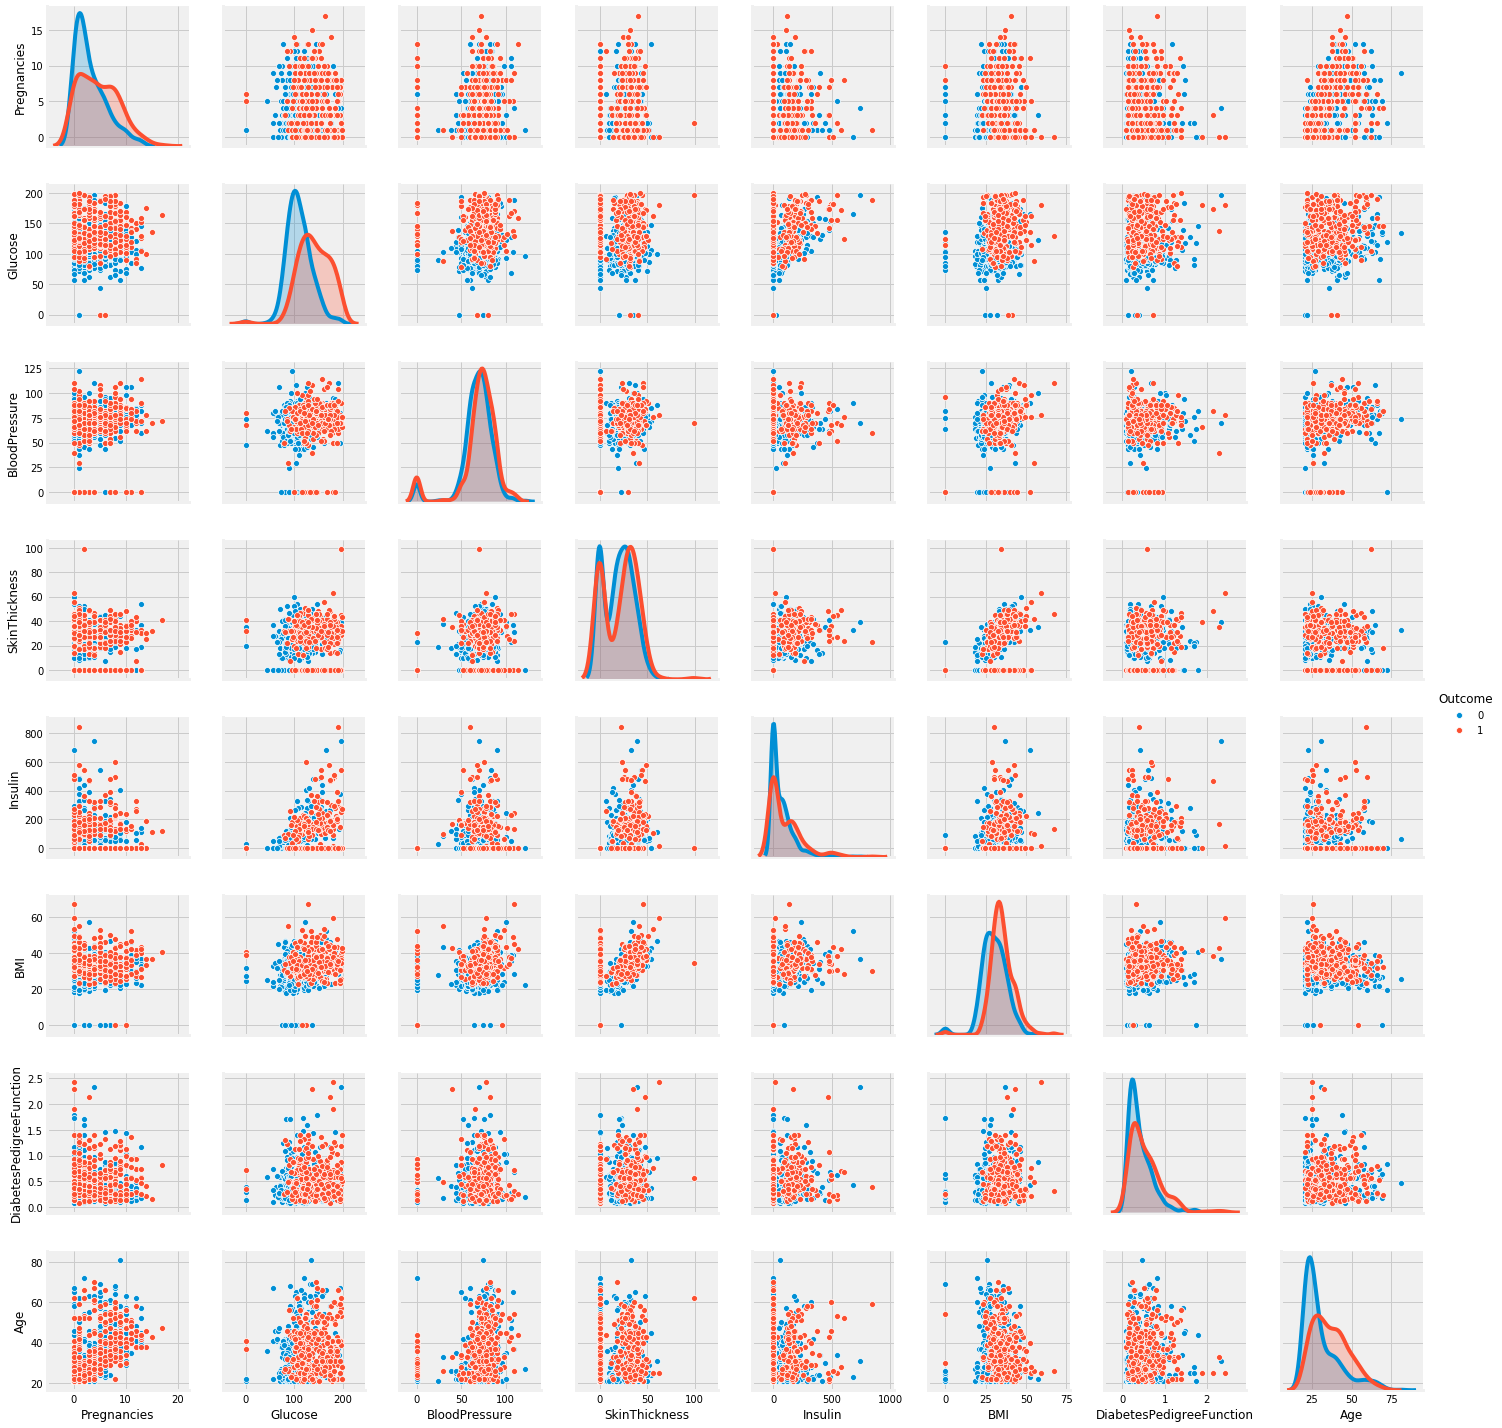

In [11]:
# find a correlation between the features and the response using scatterplots
sns.pairplot(df, x_vars = df.columns[:-1], y_vars = df.columns[:-1], hue = 'Outcome') 
plt.show()

**Observation**
1. The diagonal shows the distribution of the each feature with kernel density plots.
2. The scatterplots shows the joint relationship between each feature. Looking at them, we can say that no 2 features can clearly seperate the 2 outcomes. 

## Preparing X and y

- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series.

In [116]:
X = df.iloc[:, :-1].values()
y = df.iloc[:, -1].values()

TypeError: 'numpy.ndarray' object is not callable

## Splitting X and y into training and testing sets

**Stratified sampling** aims at splitting one dataset so that each split are similar with respect to something.

In this classification setting, the **stratifying y** helps to ensure that the train and test sets have approximately the same percentage of samples of each target class as the complete set.

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify = y)

## Standardising the data

There can be a lot of **deviation** in the given dataset. An example in the dataset can be the BMI which has 248 unique values. This high variance has to be standardised. 

**Standardization** is transforming the data such that it has a mean of 0 and a standard deviation of 1 (Normal Distribution).

In [64]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Creating the classfiers from machine learning models

For k-Nearest Neighbors, k = 5 is randomly chosen. This parameter can later be tuned using **cross-validation**.

In [65]:
# Logistic Regression 
from sklearn.linear_model import LogisticRegression
clf_1 = LogisticRegression(random_state = 0)

# k-Nearest Neighbors 
from sklearn.neighbors import KNeighborsClassifier 
clf_2 = KNeighborsClassifier(n_neighbors = 5)

# Linear Support Vector Machine  
from sklearn.svm import SVC
clf_3 = SVC(kernel = 'linear', random_state = 0)

# Radial Support Vector Machine 
clf_4 = SVC(kernel = 'rbf', random_state = 0)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf_5 = GaussianNB()

# Decision Tree Classification 
from sklearn.tree import DecisionTreeClassifier 
clf_6 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

# Random Forest Classificaiton 
from sklearn.ensemble import RandomForestrestClassifier 
clf_7 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

## Fitting (training) the classifiers to the training set and calculate the accuracy of each model on the test set 

In [66]:
from sklearn.metrics import accuracy_score 

acc = []
classifiers_name = ['Logistic Regression', 'KNN', 'Linear SVM', 'Radial SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest']
classifiers = [clf_1, clf_2, clf_3, clf_4, clf_5, clf_6, clf_7]

for classifier in classifiers: 
    classifier.fit(X_train, y_train)
    acc.append(round(classifier.score(X_test, y_test) * 100, 2))

acc_df = pd.DataFrame(acc, index = classifiers_name, columns = ['Accuracy (%)'])
acc_df

,Accuracy (%)
Logistic Regression,78.12
KNN,78.65
Linear SVM,77.08
Radial SVM,78.65
Naive Bayes,73.96
Decision Tree,72.92
Random Forest,77.60


**Drawback**: this provides a **high variance** estimate since changing which observations happen to be in the testing set can significantly change testing accuracy. Another more preferable for testing accuracy of models is **K-Fold cross-validation**.

## Steps for K-fold cross-validation

1. Split the dataset into K **equal** partitions (or "folds").
2. Use fold 1 as the **testing set** and the union of the other folds as the **training set**.
3. Calculate **testing accuracy**
4. Repeat steps 2 and 3 K times, using a **different fold** as the testing set each time. 
5. Use the **average testing accuracy** as the estimate of out-of-sample accuracy. 

Diagram of a **5-fold cross-validation**:

![5-fold cross-validation](images/07_cross_validation_diagram.png)

## Comparing cross-validation to train/test split

Advantages of **cross-validation:**

- More accurate estimate of out-of-sample accuracy
- More "efficient" use of data (every observation is used for both training and testing)

Advantages of **train/test split:**

- Runs K times faster than K-fold cross-validation
- Simpler to examine the detailed results of the testing process

## Cross-validation recommendations 

1. K can be any number, but **K=10** is generally recommended
2. For classification problems, **stratified sampling** is recommended for creating the folds
    - Each response class should be represented with equal proportions in each of the K folds
    - scikit-learn's `cross_val_score` function does this by default

## Cross-validation in Grid Search for parameter tuning

**Goal**: k = 5 is randomly chosen for KNN. But with cross-validation in grid search, the best k can be found. 

A **grid search** is a parameter sweep, which is simply an exhaustive searching through a manually specified subset of the hyperparameter space of a learning algorithm. All estimators in scikit where name ends with **CV** perform **cross-validation**. 

During cross-validation, we pass the whole X and y to grid_search, not X_train and y_train as cross validation already takes care of splitting the data into folds. And thus we don't need to split the data ourselves anymore.

**Standardisation** must be done within **each cross-validation iteration**, not just once at the beginning as with each new split, the training set and test set have been changed. We use a `Pipeline` to take care of this. 

In [90]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline

# use 10 folds
k_fold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 0)

parameters = [{'n_neighbors' : [5, 10, 15, 20, 25, 30, 35, 40]}]

grid_search = Pipeline([('transformer', StandardScaler()), ('grid_search', GridSearchCV(estimator = clf_2, 
                                                        param_grid = parameters, scoring = 'accuracy', 
                                                        cv = k_fold, refit = True, n_jobs = 1))])
grid_search = grid_search.fit(X, y)

In [88]:
best_accuracy = grid_search.named_steps['grid_search'].best_score_
best_params = grid_search.named_steps['grid_search'].best_params_
print(f'Best accuracy: {best_accuracy}. Best parameters: {best_params}')

Best accuracy: 0.7565104166666666. Best parameters: {'n_neighbors': 20}


In [101]:
# update k-Nearest Neighbors in classifiers 
clf_2 = KNeighborsClassifier(n_neighbors = 20)
classifiers = [clf_1, clf_2, clf_3, clf_4, clf_5, clf_6, clf_7]

## Cross-validation for model selection

**Goal**: Find the model with the highest accuracy.

In [106]:
# use 10 folds
k_fold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 0)

acc_cv_models = []
acc_cv_means = [] 
acc_final = []

for classifier in classifiers:
    clf = classifier
    pipeline = Pipeline([('transformer', StandardScaler()), ('estimator', clf)])
    acc_cv = cross_val_score(pipeline, X = X, y = y, cv = k_fold, scoring = 'accuracy')
    acc_cv_models.append(list(acc_cv))
    acc_cv_means.append(round(acc_cv.mean() * 100, 2))

print('Accuracy Difference')
acc_cv_df = pd.DataFrame({'Train/test split (%)': acc, 'Cross-validation (%)': acc_cv_means}, index = classifiers_name)    
acc_cv_df

Accuracy Difference


,Train/test split (%),Cross-validation (%)
Logistic Regression,78.12,77.61
KNN,78.65,75.78
Linear SVM,77.08,76.57
Radial SVM,78.65,75.52
Naive Bayes,73.96,74.86
Decision Tree,72.92,71.63
Random Forest,77.60,75.13


Visualise the accuracy of models with boxlots.

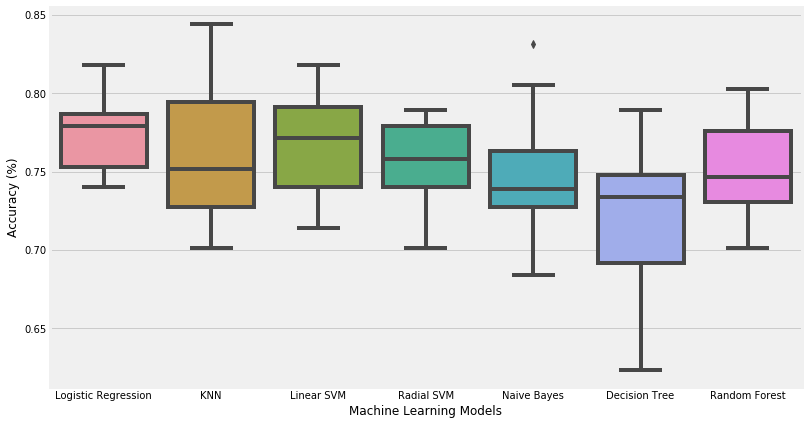

In [107]:
acc_cv_models_df = pd.DataFrame(acc_cv_models, index = classifiers_name)
f, ax = plt.subplots(figsize = (12, 7))
ax = sns.boxplot(data = acc_cv_models_df.T)
ax.set_xlabel('Machine Learning Models')
ax.set_ylabel('Accuracy (%)')
plt.show()

The boxplot shows that Logistic Regression, Linear SVM and Radial SVM perform the best while Decision Tree is the worst model. 

## Improvements to cross-validation

**Repeated cross-validation**

- Repeat cross-validation multiple times (with **different random splits** of the data) and average the results
- More reliable estimate of out-of-sample performance by **reducing the variance** associated with a single trial of cross-validation

**Creating a hold-out set**

- "Hold out" a portion of the data **before** beginning the model building process
- Locate the best model using cross-validation on the remaining data, and test it **using the hold-out set**
- More reliable estimate of out-of-sample performance since hold-out set is **truly out-of-sample**

**Feature engineering and selection within cross-validation iterations**

- Normally, feature engineering and selection occurs **before** cross-validation
- Instead, perform all feature engineering and selection **within each cross-validation iteration**
- More reliable estimate of out-of-sample performance since it **better mimics** the application of the model to out-of-sample data

## Artificial Neural Network (ANN)

For a classification problem, an ANN can also be used.



In [144]:
# Importing the Keras libraries and packages 
import keras
from keras.models import Sequential 
from keras.layers import Dense 

In [118]:
# Defining 10-fold cross validation test 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits = 10, shuffle = True)
cvscores = []

for train, test in kfold.split(X, y):
    # Feature Scaling 
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X[train])
    X_test = sc_X.transform(X[test])
    
    y_train = y[train]
    y_test = y[test]
    
    # Initialising the ANN
    classifier = Sequential()

    # Adding the input layer and the first hidden layer 
    classifier.add(Dense(units = 4, kernel_initializer = "uniform", activation="relu", input_dim = 8))

    # Adding the second hidden layer 
    classifier.add(Dense(units = 4, kernel_initializer = "uniform", activation="relu"))

    # Adding the output layer 
    classifier.add(Dense(units = 1, kernel_initializer = "uniform", activation="sigmoid"))

    # Compiling the ANN 
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

    # Fitting the ANN to the Training Set 
    classifier.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 1)
    
    # Evaluating the model
    scores = classifier.evaluate(X_test, y_test, verbose = 1)
    cvscores.append(scores[1])

Epoch 1/100
691/691 [==============================] - 1s 846us/step - loss: 0.6887 - acc: 0.6368
Epoch 2/100
691/691 [==============================] - 0s 127us/step - loss: 0.6731 - acc: 0.6512
Epoch 3/100
691/691 [==============================] - 0s 68us/step - loss: 0.6305 - acc: 0.6512
Epoch 4/100
691/691 [==============================] - 0s 124us/step - loss: 0.5734 - acc: 0.6512
Epoch 5/100
691/691 [==============================] - 0s 100us/step - loss: 0.5340 - acc: 0.7135
Epoch 6/100
691/691 [==============================] - 0s 114us/step - loss: 0.5141 - acc: 0.7728
Epoch 7/100
691/691 [==============================] - 0s 121us/step - loss: 0.5021 - acc: 0.7656
Epoch 8/100
691/691 [==============================] - 0s 120us/step - loss: 0.4925 - acc: 0.7699
Epoch 9/100
691/691 [==============================] - 0s 108us/step - loss: 0.4861 - acc: 0.7670
Epoch 10/100
691/691 [==============================] - 0s 110us/step - loss: 0.4809 - acc: 0.7728
Epoch 11/100
691/691

Epoch 67/100
691/691 [==============================] - 0s 95us/step - loss: 0.4373 - acc: 0.7873
Epoch 68/100
691/691 [==============================] - 0s 89us/step - loss: 0.4374 - acc: 0.7873
Epoch 69/100
691/691 [==============================] - 0s 58us/step - loss: 0.4365 - acc: 0.7873
Epoch 70/100
691/691 [==============================] - 0s 91us/step - loss: 0.4371 - acc: 0.7916
Epoch 71/100
691/691 [==============================] - 0s 94us/step - loss: 0.4369 - acc: 0.7902
Epoch 72/100
691/691 [==============================] - 0s 97us/step - loss: 0.4367 - acc: 0.7902
Epoch 73/100
691/691 [==============================] - 0s 85us/step - loss: 0.4370 - acc: 0.7902
Epoch 74/100
691/691 [==============================] - 0s 91us/step - loss: 0.4358 - acc: 0.7887
Epoch 75/100
691/691 [==============================] - 0s 87us/step - loss: 0.4359 - acc: 0.7873
Epoch 76/100
691/691 [==============================] - 0s 91us/step - loss: 0.4352 - acc: 0.7887
Epoch 77/100
691/691

691/691 [==============================] - 0s 133us/step - loss: 0.4502 - acc: 0.7887
Epoch 32/100
691/691 [==============================] - 0s 102us/step - loss: 0.4486 - acc: 0.7858
Epoch 33/100
691/691 [==============================] - 0s 102us/step - loss: 0.4484 - acc: 0.7844
Epoch 34/100
691/691 [==============================] - 0s 113us/step - loss: 0.4483 - acc: 0.7829
Epoch 35/100
691/691 [==============================] - 0s 113us/step - loss: 0.4481 - acc: 0.7916
Epoch 36/100
691/691 [==============================] - 0s 104us/step - loss: 0.4476 - acc: 0.7902
Epoch 37/100
691/691 [==============================] - 0s 105us/step - loss: 0.4474 - acc: 0.7858
Epoch 38/100
691/691 [==============================] - 0s 111us/step - loss: 0.4468 - acc: 0.7887
Epoch 39/100
691/691 [==============================] - 0s 115us/step - loss: 0.4469 - acc: 0.7873
Epoch 40/100
691/691 [==============================] - 0s 114us/step - loss: 0.4468 - acc: 0.7844
Epoch 41/100
691/691 [=

691/691 [==============================] - 0s 111us/step - loss: 0.4763 - acc: 0.7757
Epoch 97/100
691/691 [==============================] - 0s 127us/step - loss: 0.4766 - acc: 0.7786
Epoch 98/100
691/691 [==============================] - 0s 121us/step - loss: 0.4764 - acc: 0.7757
Epoch 99/100
691/691 [==============================] - 0s 111us/step - loss: 0.4761 - acc: 0.7757
Epoch 100/100
77/77 [==============================] - 0s 2ms/step
Epoch 1/100
691/691 [==============================] - 1s 933us/step - loss: 0.6891 - acc: 0.6339
Epoch 2/100
691/691 [==============================] - 0s 94us/step - loss: 0.6734 - acc: 0.6512
Epoch 3/100
691/691 [==============================] - 0s 99us/step - loss: 0.6318 - acc: 0.6512
Epoch 4/100
691/691 [==============================] - 0s 118us/step - loss: 0.5735 - acc: 0.6527
Epoch 5/100
691/691 [==============================] - 0s 128us/step - loss: 0.5309 - acc: 0.7352
Epoch 6/100
691/691 [==============================] - 0s 104u

691/691 [==============================] - 0s 97us/step - loss: 0.4472 - acc: 0.7945
Epoch 61/100
691/691 [==============================] - 0s 100us/step - loss: 0.4465 - acc: 0.7931
Epoch 62/100
691/691 [==============================] - 0s 95us/step - loss: 0.4463 - acc: 0.7945
Epoch 63/100
691/691 [==============================] - 0s 96us/step - loss: 0.4461 - acc: 0.7931
Epoch 64/100
691/691 [==============================] - 0s 95us/step - loss: 0.4458 - acc: 0.7945
Epoch 65/100
691/691 [==============================] - 0s 92us/step - loss: 0.4464 - acc: 0.7902
Epoch 66/100
691/691 [==============================] - 0s 97us/step - loss: 0.4453 - acc: 0.7931
Epoch 67/100
691/691 [==============================] - 0s 97us/step - loss: 0.4458 - acc: 0.7931
Epoch 68/100
691/691 [==============================] - 0s 95us/step - loss: 0.4449 - acc: 0.7916
Epoch 69/100
691/691 [==============================] - 0s 94us/step - loss: 0.4450 - acc: 0.7959
Epoch 70/100
691/691 [==========

692/692 [==============================] - 0s 118us/step - loss: 0.4506 - acc: 0.7818
Epoch 25/100
692/692 [==============================] - 0s 111us/step - loss: 0.4503 - acc: 0.7818
Epoch 26/100
692/692 [==============================] - 0s 111us/step - loss: 0.4496 - acc: 0.7847
Epoch 27/100
692/692 [==============================] - 0s 105us/step - loss: 0.4492 - acc: 0.7818
Epoch 28/100
692/692 [==============================] - 0s 94us/step - loss: 0.4488 - acc: 0.7818
Epoch 29/100
692/692 [==============================] - 0s 118us/step - loss: 0.4489 - acc: 0.7832
Epoch 30/100
692/692 [==============================] - 0s 114us/step - loss: 0.4482 - acc: 0.7832
Epoch 31/100
692/692 [==============================] - 0s 75us/step - loss: 0.4482 - acc: 0.7847
Epoch 32/100
692/692 [==============================] - 0s 103us/step - loss: 0.4480 - acc: 0.7861
Epoch 33/100
692/692 [==============================] - 0s 98us/step - loss: 0.4480 - acc: 0.7803
Epoch 34/100
692/692 [====

Epoch 7/100
692/692 [==============================] - 0s 107us/step - loss: 0.6156 - acc: 0.7746
Epoch 8/100
692/692 [==============================] - 0s 115us/step - loss: 0.6042 - acc: 0.7746
Epoch 9/100
692/692 [==============================] - 0s 117us/step - loss: 0.5945 - acc: 0.7702
Epoch 10/100
692/692 [==============================] - 0s 107us/step - loss: 0.5853 - acc: 0.7702
Epoch 11/100
692/692 [==============================] - 0s 102us/step - loss: 0.5769 - acc: 0.7746
Epoch 12/100
692/692 [==============================] - 0s 95us/step - loss: 0.5700 - acc: 0.7760
Epoch 13/100
692/692 [==============================] - 0s 83us/step - loss: 0.5635 - acc: 0.7760
Epoch 14/100
692/692 [==============================] - 0s 70us/step - loss: 0.5577 - acc: 0.7673
Epoch 15/100
692/692 [==============================] - 0s 90us/step - loss: 0.5523 - acc: 0.7717
Epoch 16/100
692/692 [==============================] - 0s 96us/step - loss: 0.5478 - acc: 0.7717
Epoch 17/100
692/6

In [122]:
acc_cv_models.append(cvscores)
acc_cv_means.append(round(np.mean(cvscores) * 100, 2))
classifiers_name.append('ANN')

In [143]:
acc_cv_df = pd.DataFrame({'Accuracy (%)': acc_cv_means}, index = classifiers_name)    
acc_cv_df

,Accuracy (%)
Logistic Regression,77.61
KNN,75.78
Linear SVM,76.57
Radial SVM,75.52
Naive Bayes,74.86
Decision Tree,71.63
Random Forest,75.13
ANN,76.83


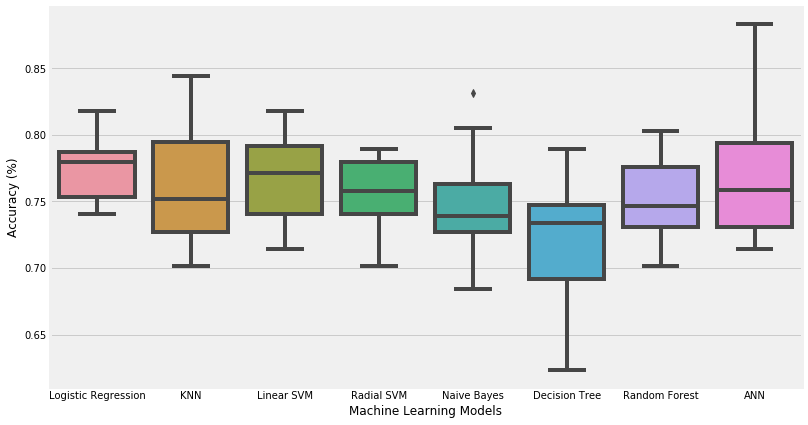

In [139]:
acc_cv_models_df = pd.DataFrame(acc_cv_models, index = classifiers_name)
f, ax = plt.subplots(figsize = (12, 7))
ax = sns.boxplot(data = acc_cv_models_df.T)
ax.set_xlabel('Machine Learning Models')
ax.set_ylabel('Accuracy (%)')
plt.show()

ANN Classifier doesn't improve the accuracy drastically. Logistic Regression is still the best choice because of its simplicity and speed.